<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Cinzel&family=Rokkitt:ital@1&display=swap" rel="stylesheet">

<h1 style="text-align:center;font-family: 'Cinzel', serif;">Practical Lab 4 - Multivariate Linear and Polynomial Regression, and Evaluation using MAE and MAPE.</h1>
<h2 style="text-align:center;font-family: 'Cinzel', serif;">Waseem Raja Shaik</h2>
<h2 style="text-align:center;font-family: 'Cinzel', serif;">Student Id - 8894805</h2>

<h2 style="text-align:center;font-family: 'Rokkitt', serif;">Imported Libraries like</h2>
<img src="https://numpy.org/doc/stable/_static/numpylogo.svg" style="background-color:white;padding:10px;" width="500">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" style="background-color:white;padding:10px;" width="500">
<img src="https://matplotlib.org/3.1.0/_images/sphx_glr_logos2_003.png" style="background-color:white;padding:10px;" width="500">



<h2 style="text-align:center;font-family: 'Rokkitt', serif;">In this lab, we will run multivariate linear and polynomial regression, and evaluate them using the Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE) metrices. The dataset will be Scikit Learn Diabetes dataset - the same one used in Practical Lab 3.</h2>

<p>Use the code provided by professor to get the data, and run the train-test split. Description of each column can be found in <a href="https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset" rel="nofollow">sklearn documentation</a>. Look at the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes" rel="nofollow">documentation</a> for the <code>load_diabetes</code> method to know what are <code>as_frame</code> and <code>scaled</code> for.</p>

In [49]:
from sklearn import datasets
from sklearn.metrics import mean_absolute_error, mean_squared_error ,mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    # Added to get coefficient values and Intercept value.
    if(hasattr(model,'coef_')):
        print(f'The coefficient values are: {model.coef_}')

    if(hasattr(model,'intercept_')):
        print(f'The Intercept values are: {model.intercept_}')
    
    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()

The coefficient values are: [  0.13768782 -23.06446772   5.84636265   1.19709252  -1.28168474
   0.81115203   0.60165319  10.15953917  67.1089624    0.20159907]
The Intercept values are: -341.37823633350536
Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


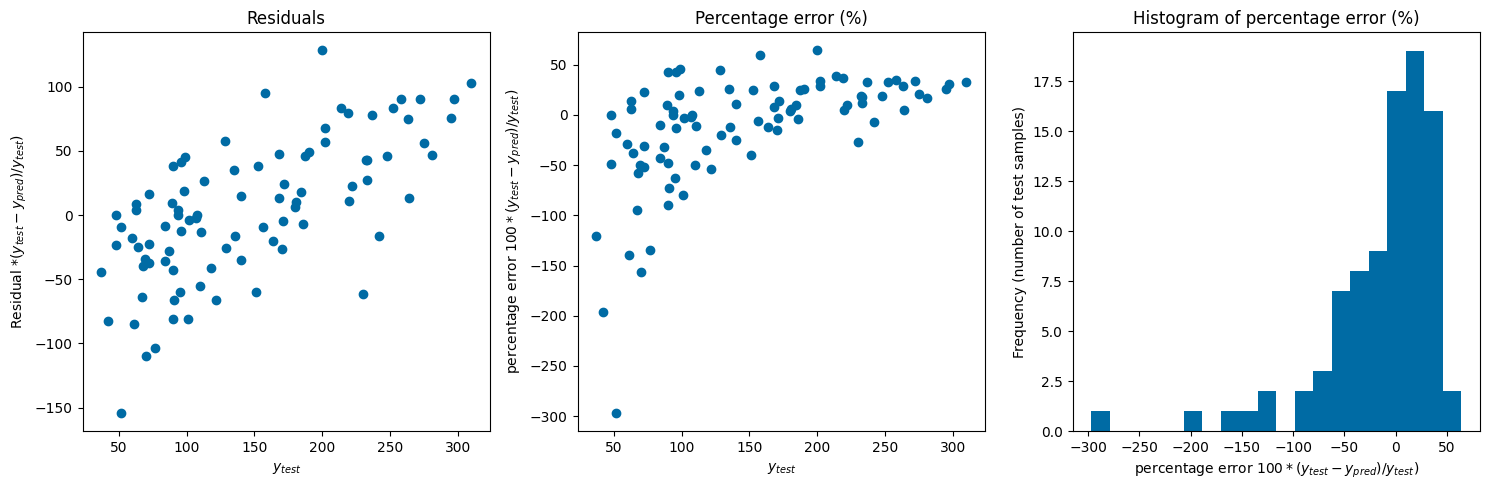

In [50]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

plt.style.use("tableau-colorblind10")

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)
model_estimation(linear_model, y_train, y_test, y_pred_train, y_pred_test)

The coefficient values are: [-9.58870948e+00 -1.12365902e+01 -1.97034162e+01  1.06379230e+01
 -1.65861249e+01  2.61365196e+01  1.11310664e+01 -1.60285455e+02
 -1.76867225e+03 -1.38219346e+01  3.15406146e-02  5.27927859e-01
 -5.05251654e-02  8.27864414e-03 -4.69221125e-03 -4.11958227e-02
  7.90051404e-02  1.31330339e+00  4.05782665e-01  1.29086977e-02
 -3.37097655e+01  3.56392866e-01  4.11635640e-01  2.10945698e-01
  2.46979126e-01 -1.23858285e+00 -2.67405149e+01  1.85205406e+01
  2.71714002e-01  9.30386694e-02  1.24233391e-01 -9.12925112e-02
  1.23145042e-01 -8.38998327e-03 -1.42557179e+00  3.63090460e+00
  2.11743234e-02 -3.04122515e-03  9.44206880e-02 -7.89080772e-02
 -1.05037131e-01 -1.77369257e-01 -2.47742390e+00 -4.70871259e-02
  1.76808663e-01 -2.77391465e-01 -3.11818052e-01 -1.28145919e+00
 -5.05386041e+00 -4.46697115e-02  1.11992817e-01  1.98609397e-01
  3.73559356e-01  3.37682457e+00  2.68468399e-02  1.49596869e-01
  2.19722165e+00  4.45625595e+00  1.18907975e-01  1.63126546e+

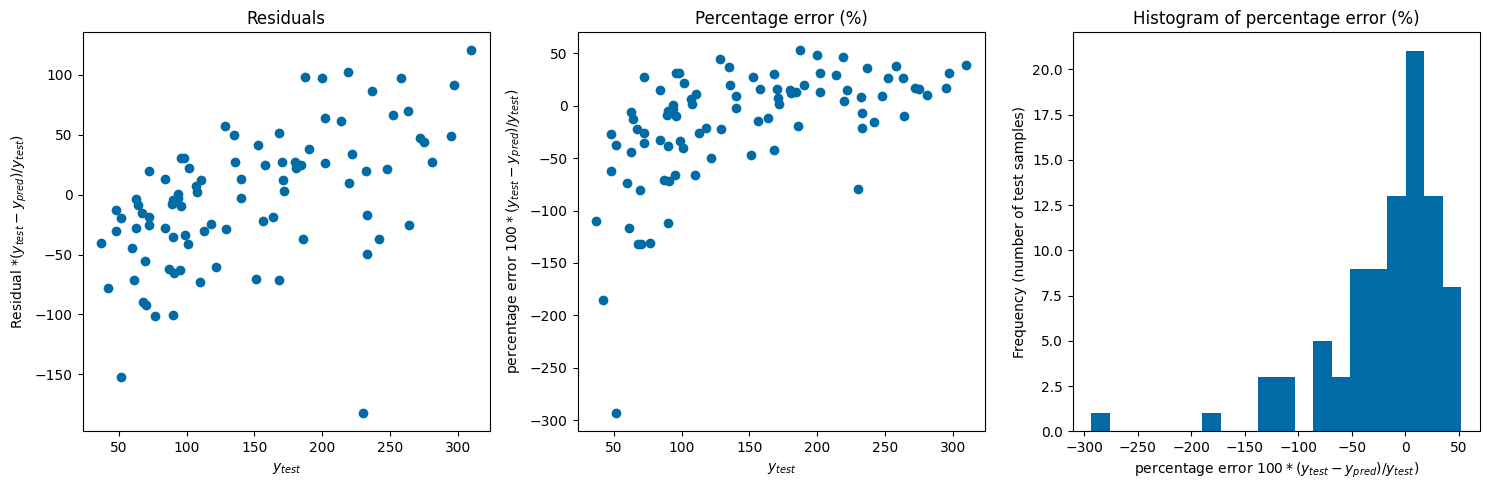

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_model = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = polynomial_model.fit_transform(X_train)
X_test_poly = polynomial_model.fit_transform(X_test)

ploy_regression_model = LinearRegression()
ploy_regression_model.fit(X_train_poly,y_train)

y_pred_train_ploy = ploy_regression_model.predict(X_train_poly)
y_pred_test_ploy = ploy_regression_model.predict(X_test_poly)

model_estimation(ploy_regression_model, y_train, y_test, y_pred_train_ploy, y_pred_test_ploy)

# Solution by using sklearn pipeline 

The coefficient values are: [ 1.30212118e+08  1.01037676e+03  1.22321346e+03  4.24554342e+03
  8.23711100e+04 -8.50467012e+04 -7.78412406e+04  8.24355729e+04
  6.05503754e+05  2.55851504e+03  3.87086866e-01 -1.95314276e+08
  3.14528166e+00 -5.50225624e+00 -3.55427260e+02  3.57042902e+02
  3.53272940e+02 -1.09486277e+02 -1.55867487e+03  5.04393780e+00
  3.12206297e+03  7.03271398e+02  2.55169842e+03  4.89821179e+04
 -5.05743185e+04 -4.62924993e+04  4.90401833e+04  3.60726535e+05
  1.54325771e+03 -1.26514140e+01 -1.39080234e+01  3.63380465e+02
 -3.66370686e+02 -3.76985898e+02  3.84801282e+01 -1.82700529e+02
  5.53681243e-01 -2.96401633e+00 -1.11158811e+03  1.11309885e+03
  1.11571288e+03 -6.04407970e+01 -3.58645157e+03  1.42195423e+00
  9.38222458e+02 -1.64432638e+03 -2.04768412e+03 -3.25270782e+03
 -6.33419258e+03 -7.35065207e+02  7.03149239e+02  1.83194132e+03
  3.51146899e+03  8.22037332e+03  7.33696955e+02  1.09313281e+03
  2.69141808e+03  3.29352704e+03  7.32083381e+02 -3.88396291e+

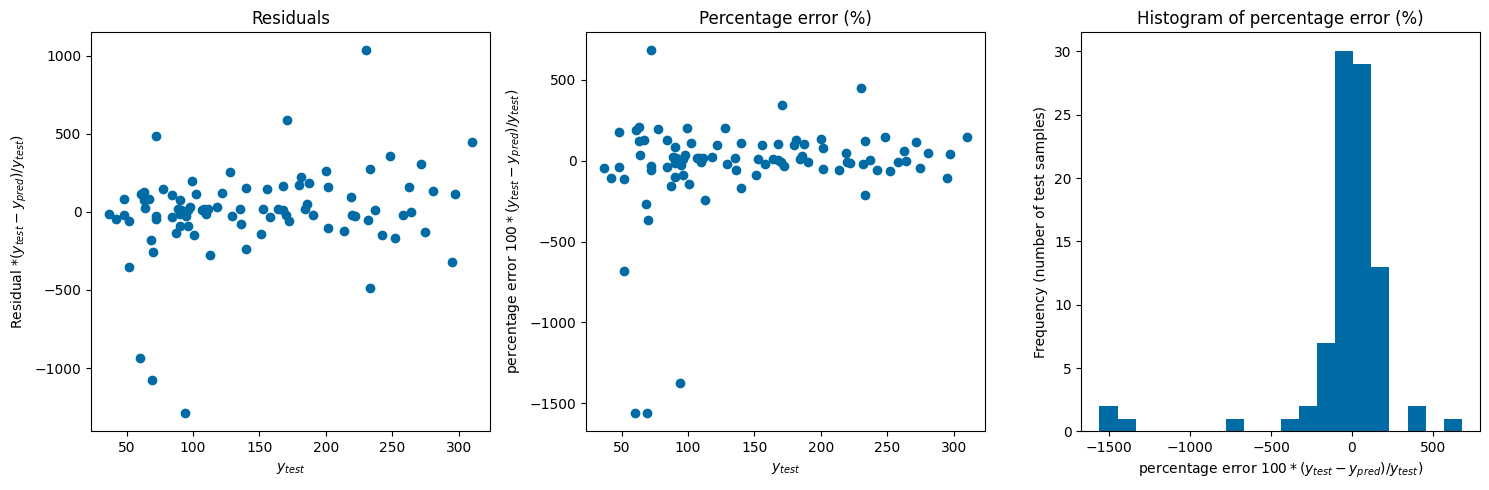

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

linear_polynomial_model = Pipeline([('polynomial', PolynomialFeatures(degree=3, include_bias=False)), 
                  ('linear', LinearRegression())]) 
linear_polynomial_model.fit(X_train,y_train)

y_pred_train = linear_polynomial_model.predict(X_train)
y_pred_test = linear_polynomial_model.predict(X_test)

model_estimation(linear_polynomial_model[1], y_train, y_test, y_pred_train, y_pred_test)

How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values. Hint: for explaining the parameters of the polynomial regression, you can use poly.get_feature_names_out().


X_train and X_test data has 10 columns which means it has original parameters fit in Linear Regression
Name of them are

In [53]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)

X train shape (353, 10)
X test shape (89, 10)


In [54]:
print('Name of them are:', [name for name in X_train.columns.values])

Name of them are: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [55]:
poly_train_feature_names = polynomial_model.get_feature_names_out(X_train.columns)
poly_test_feature_names = polynomial_model.get_feature_names_out(X_test.columns)
print(f'X_train data fit on Polynominal model: {poly_train_feature_names}')
print('---------')
print(f'X_test data fit on Polynominal model: {poly_test_feature_names}')

print("Number of polynomial features:", len(poly_test_feature_names))



X_train data fit on Polynominal model: ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'age^2' 'age sex'
 'age bmi' 'age bp' 'age s1' 'age s2' 'age s3' 'age s4' 'age s5' 'age s6'
 'sex^2' 'sex bmi' 'sex bp' 'sex s1' 'sex s2' 'sex s3' 'sex s4' 'sex s5'
 'sex s6' 'bmi^2' 'bmi bp' 'bmi s1' 'bmi s2' 'bmi s3' 'bmi s4' 'bmi s5'
 'bmi s6' 'bp^2' 'bp s1' 'bp s2' 'bp s3' 'bp s4' 'bp s5' 'bp s6' 's1^2'
 's1 s2' 's1 s3' 's1 s4' 's1 s5' 's1 s6' 's2^2' 's2 s3' 's2 s4' 's2 s5'
 's2 s6' 's3^2' 's3 s4' 's3 s5' 's3 s6' 's4^2' 's4 s5' 's4 s6' 's5^2'
 's5 s6' 's6^2']
---------
X_test data fit on Polynominal model: ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'age^2' 'age sex'
 'age bmi' 'age bp' 'age s1' 'age s2' 'age s3' 'age s4' 'age s5' 'age s6'
 'sex^2' 'sex bmi' 'sex bp' 'sex s1' 'sex s2' 'sex s3' 'sex s4' 'sex s5'
 'sex s6' 'bmi^2' 'bmi bp' 'bmi s1' 'bmi s2' 'bmi s3' 'bmi s4' 'bmi s5'
 'bmi s6' 'bp^2' 'bp s1' 'bp s2' 'bp s3' 'bp s4' 'bp s5' 'bp s6' 's1^2'
 's1 s2' 's1 s3' 's1 s4' 's1

# Add any further comparisons and code

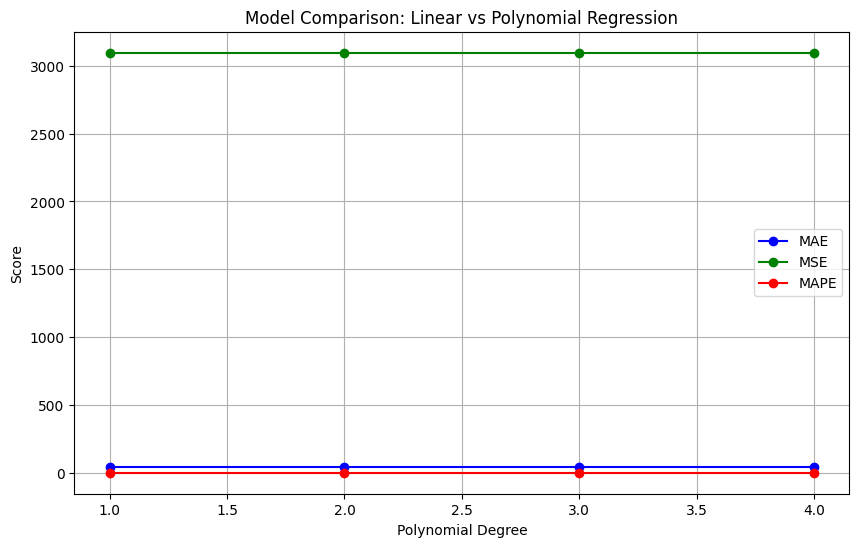

In [56]:
poly_degrees = [1, 2, 3, 4]
mean_absolute_error_scores = []
square_mean_absolute_error_scores = []
mean_absolute_percentage_error_scores = []

for degree in poly_degrees:
    polynomial_model = PolynomialFeatures(degree=2,include_bias=False)
    X_train_poly = polynomial_model.fit_transform(X_train)
    X_test_poly = polynomial_model.fit_transform(X_test)
    ploy_regression_model = LinearRegression()
    ploy_regression_model.fit(X_train_poly,y_train)
    y_pred_test_ploy = ploy_regression_model.predict(X_test_poly)
    mean_absolute_error_scores.append(mean_absolute_error(y_test, y_pred_test_ploy))
    square_mean_absolute_error_scores.append(mean_squared_error(y_test, y_pred_test_ploy))
    mean_absolute_percentage_error_scores.append(mean_absolute_percentage_error(y_test, y_pred_test_ploy))

plt.figure(figsize=(10, 6))
plt.plot(poly_degrees, mean_absolute_error_scores, 'bo-', label='MAE')
plt.plot(poly_degrees, square_mean_absolute_error_scores, 'go-', label='MSE')
plt.plot(poly_degrees, mean_absolute_percentage_error_scores, 'ro-', label='MAPE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.title('Model Comparison: Linear vs Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


### Which model would you choose for deployment, and why?

- As you see from the above graphs. It's clear that even if the degress increases, there will not be any significant change. So I think linear regression model is already sufficient to explain the data.

### What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

- Residual graph: The graph displays the difference between actual and predicted values. 
    - Random scattering around zero for linear regression indicates a good fit, while noticeable patterns suggest that polynomial regression may capture non-linear relationships more effectively.
- Percentage Error Scatter Plot: This plot shows the relationship between actual values and percentage errors.
    - Random scatter around zero in linear regression implies accurate predictions, while distinct patterns indicate potential improvement with polynomial regression.
- Percentage Error Histogram: The histogram presents the distribution of percentage errors. 
    - A symmetric and normally distributed histogram centered around zero indicates a good fit for linear regression, whereas deviations or skewed distributions suggest potential bias when using polynomial regression.

The graphs help assess goodness-of-fit, with linear regression suitable for random patterns and well-behaved errors, while caution is needed with polynomial regression for avoiding overfitting, and evaluation metrics provide a quantitative comparison as complexity increases.